# LEGACY CODE - DO NOT RUN

**This notebook contains legacy code from a previous version of the project and will not function correctly.**

**Background:** This code was written prior to the author's laptop being stolen, which resulted in the loss of several critical source files and dependencies required for this exploratory data analysis to run properly. The necessary modules in `src_new/` and associated configuration files are no longer available in the current repository state.

**Status:** 
- Code preserved for reference and documentation purposes
- Not executable in current environment
- Missing dependencies: `src_new/` module structure
- Missing configuration and preprocessing pipelines

**For Current Analysis:** Please refer to the working notebooks in the main project directory that use the current codebase architecture.

---

In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), 'src_new')))

from dotenv import load_dotenv
load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")

import logging
logging.basicConfig(level=logging.INFO)
logging.getLogger("httpx").setLevel(logging.WARNING)
logging.getLogger("openai").setLevel(logging.WARNING)

In [2]:
from src_new.utils.config_loader import ConfigLoader

config_loader = ConfigLoader()
base_config = config_loader.load_configs()
print("Config sections:", list(base_config.keys()))

INFO:numexpr.utils:NumExpr defaulting to 16 threads.
INFO:src_new.utils.config_loader:Config loader initialized with root: c:\Users\Viriya Duch Sam\Desktop\Thesis Research\ecs_msc_project\configs
INFO:src_new.utils.config_loader:Loading multi-file config structure from c:\Users\Viriya Duch Sam\Desktop\Thesis Research\ecs_msc_project\configs
INFO:src_new.utils.config_loader:Configuration validation passed successfully
INFO:src_new.utils.config_loader:Multi-file config loading completed successfully


Config sections: ['metadata', 'labels', 'subreddits', 'subreddit_ids', 'defaults', 'paths', 'caching', 'data_processing', 'preprocessing', 'modeling', 'training']


In [3]:
from src_new.data.preprocessing import PreprocessingPipeline

preprocessor = PreprocessingPipeline(configs=base_config)
try:
    data = preprocessor.run(
        force_recompute_embeddings=True,
        extract_topics=True,
        api_key=api_key,
        force_recompute_topics=False,

    )
except Exception as e:
    print(f"Error during preprocessing: {e}")
    data = None

INFO:src_new.data.preprocessing.data_loader:DataLoader initialized with data_path: data/raw/deb_label.csv
INFO:src_new.data.preprocessing.comment_embedder:CommentTextEmbedder initialized with cache_enabled=True, model_type=sbert, model_name=all-MiniLM-L6-v2, batch_size=100
INFO:src_new.data.preprocessing.temporal:TemporalProcessor initialized with configuration:
INFO:src_new.data.preprocessing.temporal: + Window strategy: fixed
INFO:src_new.data.preprocessing.temporal: + Default window size: 178 days
INFO:src_new.data.preprocessing.temporal: + Binning method: fixed_interval
INFO:src_new.data.preprocessing.temporal: + Overlap allowed: False
INFO:src_new.data.preprocessing.temporal: + Min comments per window: 10
INFO:src_new.data.preprocessing.pipeline:Starting preprocessing pipeline
INFO:src_new.data.preprocessing.pipeline:Step 1: Loading and cleaning data
INFO:src_new.data.preprocessing.data_loader:Starting data loading and cleaning process
INFO:src_new.data.preprocessing.data_loader:L

In [6]:
# Save comments, replies and pairs_all df to pickle for later use
import pandas as pd

if data is not None:
    comments_df = data.comments
    replies_df = data.replies
    pairs_all_df = data.pairs_data['pairs_all']
    pd.to_pickle(comments_df, "data/cache/comments.pkl")
    pd.to_pickle(replies_df, "data/cache/replies.pkl")
    pd.to_pickle(pairs_all_df, "data/cache/pairs_all.pkl")

# Read head
display(pd.read_pickle("data/cache/replies.pkl").head(3))
display(pd.read_pickle("data/cache/comments.pkl").head(3))
display(pd.read_pickle("data/cache/pairs_all.pkl").head(3))

,label,dst_comment_id,src_comment_id,submission_id,dst_comment_text,src_comment_text,submission_text,subreddit,dst_author,exact_time,...,is_self_reply,src_text_length,dst_text_length,year,month,day_of_week,hour,embeddings,timestep,confidence
0,0,gfvmv5x,gfvmzei,kd0se4,So now that they have elected Biden how can we...,"They haven't, it is a contested election. The ...","Forensic Audit: ""We conclude that the Dominion...",republican,guildarts15,1607998349,...,0,103,195,2020,12,1,2,"[0.036776543, -0.047532145, 0.076586746, 0.011...",1,1.0
1,2,gyn3we6,gyn4ruu,nfrunb,"Tlaib, your family is Hamas. Funded by Iran a ...",She was not truthful when she swore her oath o...,Biden and The Squad's Tlaib stage heated confr...,republican,oppositeofoutside,1621387168,...,0,183,305,2021,5,2,1,"[0.0055242963, -0.04908121, 0.06168418, 0.0273...",2,1.0
2,0,gbh1w5x,gbh2dxt,jpv1jr,Most Republicans are happy with Biden as he wi...,I'm not happy about it but I'm not going out a...,President-elect Biden is projected to win Penn...,republican,Rpdaca,1604773521,...,0,95,110,2020,11,5,18,"[0.03693985, 0.026414156, 0.04610996, -0.04668...",1,1.0


,subreddit_id,submission_id,comment_id,author,text,embeddings,timestamp,is_parent,timestep
0,0,gcx1nx,fpdxjvv,sebastian404,"Well, lets look at what else he said, *""The on...","[-0.036231328, 0.029959867, 0.035119407, 0.053...",2020-05-03 19:37:00,1,7
1,0,jb3iqr,g8t3cwl,anglo-francais,the final nail in the coffin for ~~European~~ ...,"[-0.015929654, 0.02505227, 0.08624149, -0.0224...",2020-10-14 15:43:00,1,8
2,0,k436d6,ge6ffh0,yuppwhynot,Because the EU has politely declined to fulfil...,"[-0.0068593123, 0.06960208, 0.071162924, -0.08...",2020-11-30 19:02:00,1,9


,subreddit_id,timestep,src_author,dst_author,n_disagree,n_neutral,n_agree,mean_agg_frac,mean_kappa,mean_confidence,std_confidence,min_confidence,max_confidence,net_vector
0,0,0,Lumpy_Custard_,batusfinkus,1,0,1,0.833333,0.666667,0.611111,0.549972,0.222222,1.000000,"[0.818, 0.0, 0.182]"
1,0,0,captain_blackadder,Lumpy_Custard_,1,0,0,0.666667,0.333333,0.222222,0.000000,0.222222,0.222222,"[1.0, 0.0, 0.0]"
2,0,1,APB2710,prodmerc,1,0,0,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,"[1.0, 0.0, 0.0]"


## **Data Analysis**

### **Basic Interaction Statistics**

In [7]:
import matplotlib.pyplot as plt

from src_new.utils.visualization import TopicVisualizer, TemporalVisualizer, SubredditVisualizer
from src_new.modules.analysis import ReplyStatistics, DatasetStatistics, TopicStatistics

raw = pd.DataFrame(data.raw) if data else None
replies = pd.DataFrame(data.replies) if data else None
submissions = pd.DataFrame(data.submissions_with_topics) if data else None

temporal_viz = TemporalVisualizer()
topic_viz = TopicVisualizer()
subreddit_viz = SubredditVisualizer()

In [8]:
# Basic Reply Statistics using new utilities
print("Raw Replies Data Statistics:")
raw_stats = ReplyStatistics.replies_data_statistics(raw)
display(raw_stats)

print("\nFiltered Replies Data Statistics (Non-Self-Replies):")
filtered_stats = ReplyStatistics.replies_data_statistics(replies)
display(filtered_stats)

# Print total after filtering self-replies
print(f"\nTotal Replies after filtering self-replies ({round(len(replies)/len(raw), 2)}%): {len(replies)}")

Raw Replies Data Statistics:


,Earliest Date,Latest Date,# Replies,% Self-Replies,% Disagree,% Neutral,% Agree,# Unique Comments,# Unique Authors
subreddit,,,,,,,,,
All,2015-01-03,2021-05-19,42894,0.29,39.6,26.0,34.4,75246,23101
blacklivesmatter,2020-05-27,2021-05-19,1929,0.67,32.8,22.4,44.8,3477,2516
brexit,2016-06-21,2021-05-18,15745,0.27,41.6,29.2,29.2,28108,722
climate,2015-01-03,2021-05-18,5773,0.33,40.6,27.7,31.7,10164,4580
democrats,2020-01-02,2021-05-19,9624,0.19,35.9,21.9,42.2,16531,6922
republican,2020-01-02,2021-05-19,9823,0.33,40.7,24.6,34.7,16966,8826



Filtered Replies Data Statistics (Non-Self-Replies):


,Earliest Date,Latest Date,# Replies,% Self-Replies,% Disagree,% Neutral,% Agree,# Unique Comments,# Unique Authors
subreddit,,,,,,,,,
All,2015-01-03,2021-05-19,42770,0.0,39.6,26.0,34.4,75034,23074
blacklivesmatter,2020-05-27,2021-05-19,1916,0.0,32.9,22.4,44.7,3453,2512
brexit,2016-06-21,2021-05-18,15703,0.0,41.6,29.2,29.2,28039,722
climate,2015-01-03,2021-05-18,5754,0.0,40.6,27.7,31.7,10131,4575
democrats,2020-01-02,2021-05-19,9606,0.0,35.9,21.9,42.2,16499,6915
republican,2020-01-02,2021-05-19,9791,0.0,40.7,24.6,34.7,16912,8814



Total Replies after filtering self-replies (1.0%): 42770


- The **DEBAGREEMENT** dataset spans 6+ years (2015-2021) with 42,894 total reply interactions across 5 politically-oriented subreddits, representing 23,101 unique authors. 

- We filter out about 124 self-replies, which represent about 1% of the entire dataset, leaving us with 42,770 replies.

### **Activity Patterns (3-Month Rolling Average)**

Rolling average by agreement label:


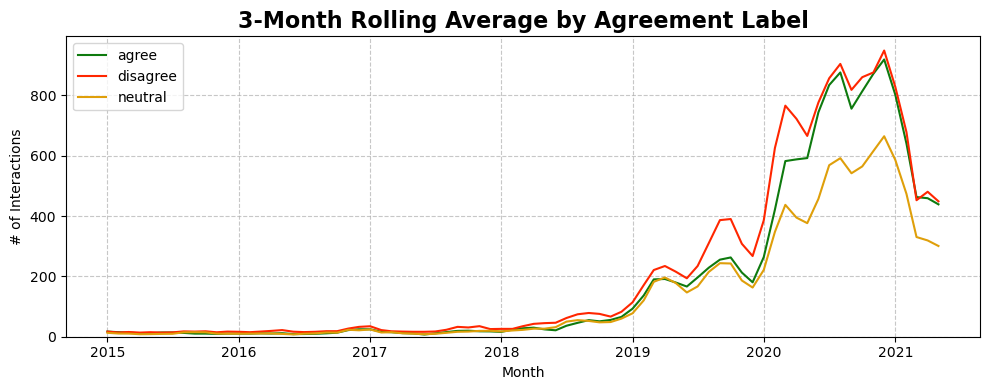


Rolling average by subreddit:


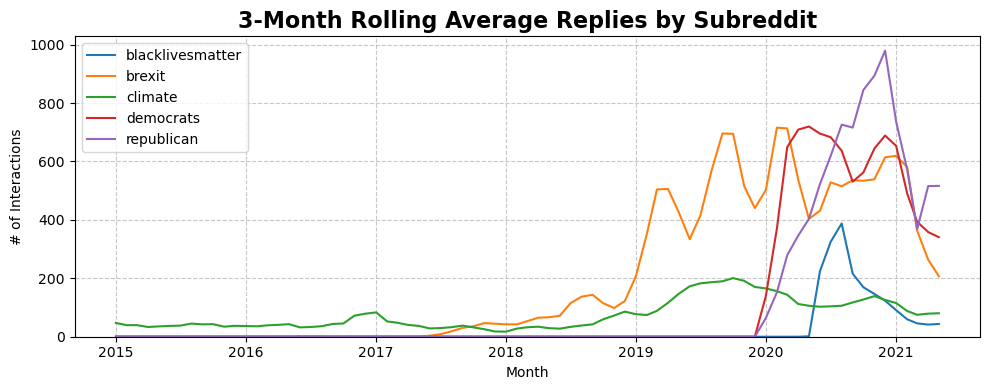

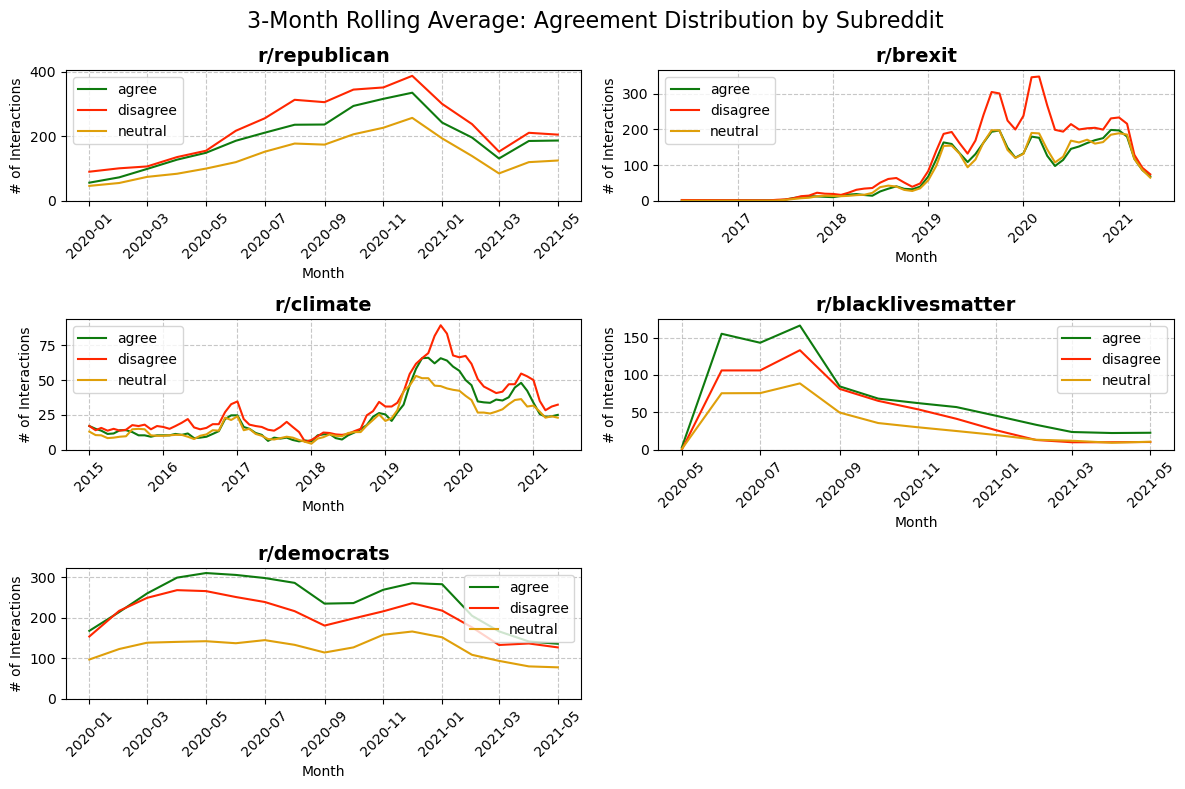

In [9]:
# Rolling average temporal visualizations using new utilities
n_months = 3

# Rolling averages by agreement label
print("Rolling average by agreement label:")
rolling_by_label = temporal_viz.plot_rolling_average_interactions(
    replies, n_months=3, group_by='label_desc', 
    title="3-Month Rolling Average by Agreement Label",
    figsize=(10, 4)
)
plt.show()

print("\nRolling average by subreddit:")
rolling_by_sub = temporal_viz.plot_rolling_average_interactions(
    replies, n_months=n_months, group_by='subreddit',
    title=f"{n_months}-Month Rolling Average Replies by Subreddit",
    figsize=(10, 4)
)
plt.show()

# Rolling average by subreddit and agreement label
rolling_by_sub_label = subreddit_viz.plot_subreddit_label_subplots(
    replies, n_months=3, 
    title="3-Month Rolling Average: Agreement Distribution by Subreddit",
    figsize=(12, 8)
)
plt.show()

### **Topic Distribution Analysis**

In [10]:
# Topic Statistics using new utilities
print("Topic Summary Statistics:")
topic_summary = TopicStatistics.create_topic_summary_statistics(submissions, raw)
display(topic_summary)

# Topic distribution matrix
print("\nTopic Distribution Matrix:")
topic_distribution = TopicStatistics.get_topic_distribution_matrix(submissions, raw)
print(f"Total unique topics: {len(topic_distribution)}")
print(f"Distribution matrix shape: {topic_distribution.shape}")

# Cross-subreddit topics
cross_topics = TopicStatistics.get_cross_subreddit_topics(topic_distribution, min_subreddits=2)
print(f"\nTopics appearing in multiple subreddits: {len(cross_topics)}")
if len(cross_topics) > 0:
    print("Top cross-subreddit topics:")
    for topic in cross_topics.index[:5]:
        counts = cross_topics.loc[topic]
        active_subs = counts[counts > 0]
        print(f"  - {topic[:60]}{'...' if len(topic) > 60 else ''}")
        print(f"    Active in: {list(active_subs.index)} (counts: {list(active_subs.values)})")

Topic Summary Statistics:


,subreddit,num_submissions,num_unique_topics,avg_submissions_per_topic,top_topic,top_topic_count,least_topic,least_topic_count,median_submissions_per_topic
0,ALL_SUBREDDITS,18080,99,182.6,Brexit Party MEP Blames Remainers,717,Defunding the Police Budget Allocation,19,153.0
1,r/blacklivesmatter,844,19,44.4,Police Violence Against Children,84,Defunding the Police Budget Allocation,19,40.0
2,r/brexit,8155,20,407.8,Brexit Party MEP Blames Remainers,717,Nigel Farage's Influence in Brexit,88,413.5
3,r/climate,2790,20,139.5,Renewable Energy Job Growth,263,Greta Thunberg Climate Activism,60,136.0
4,r/democrats,3165,20,158.2,COVID-19 Response Criticism,254,NBA Stadiums as Polling Places,103,160.5
5,r/republican,3126,20,156.3,Police Shootings Controversy,219,Cuomo's Controversies,39,167.5



Topic Distribution Matrix:
Total unique topics: 99
Distribution matrix shape: (99, 5)

Topics appearing in multiple subreddits: 0


#### **Topic Distribution Heatmap**


Topic Distribution Heatmap (Top 9):


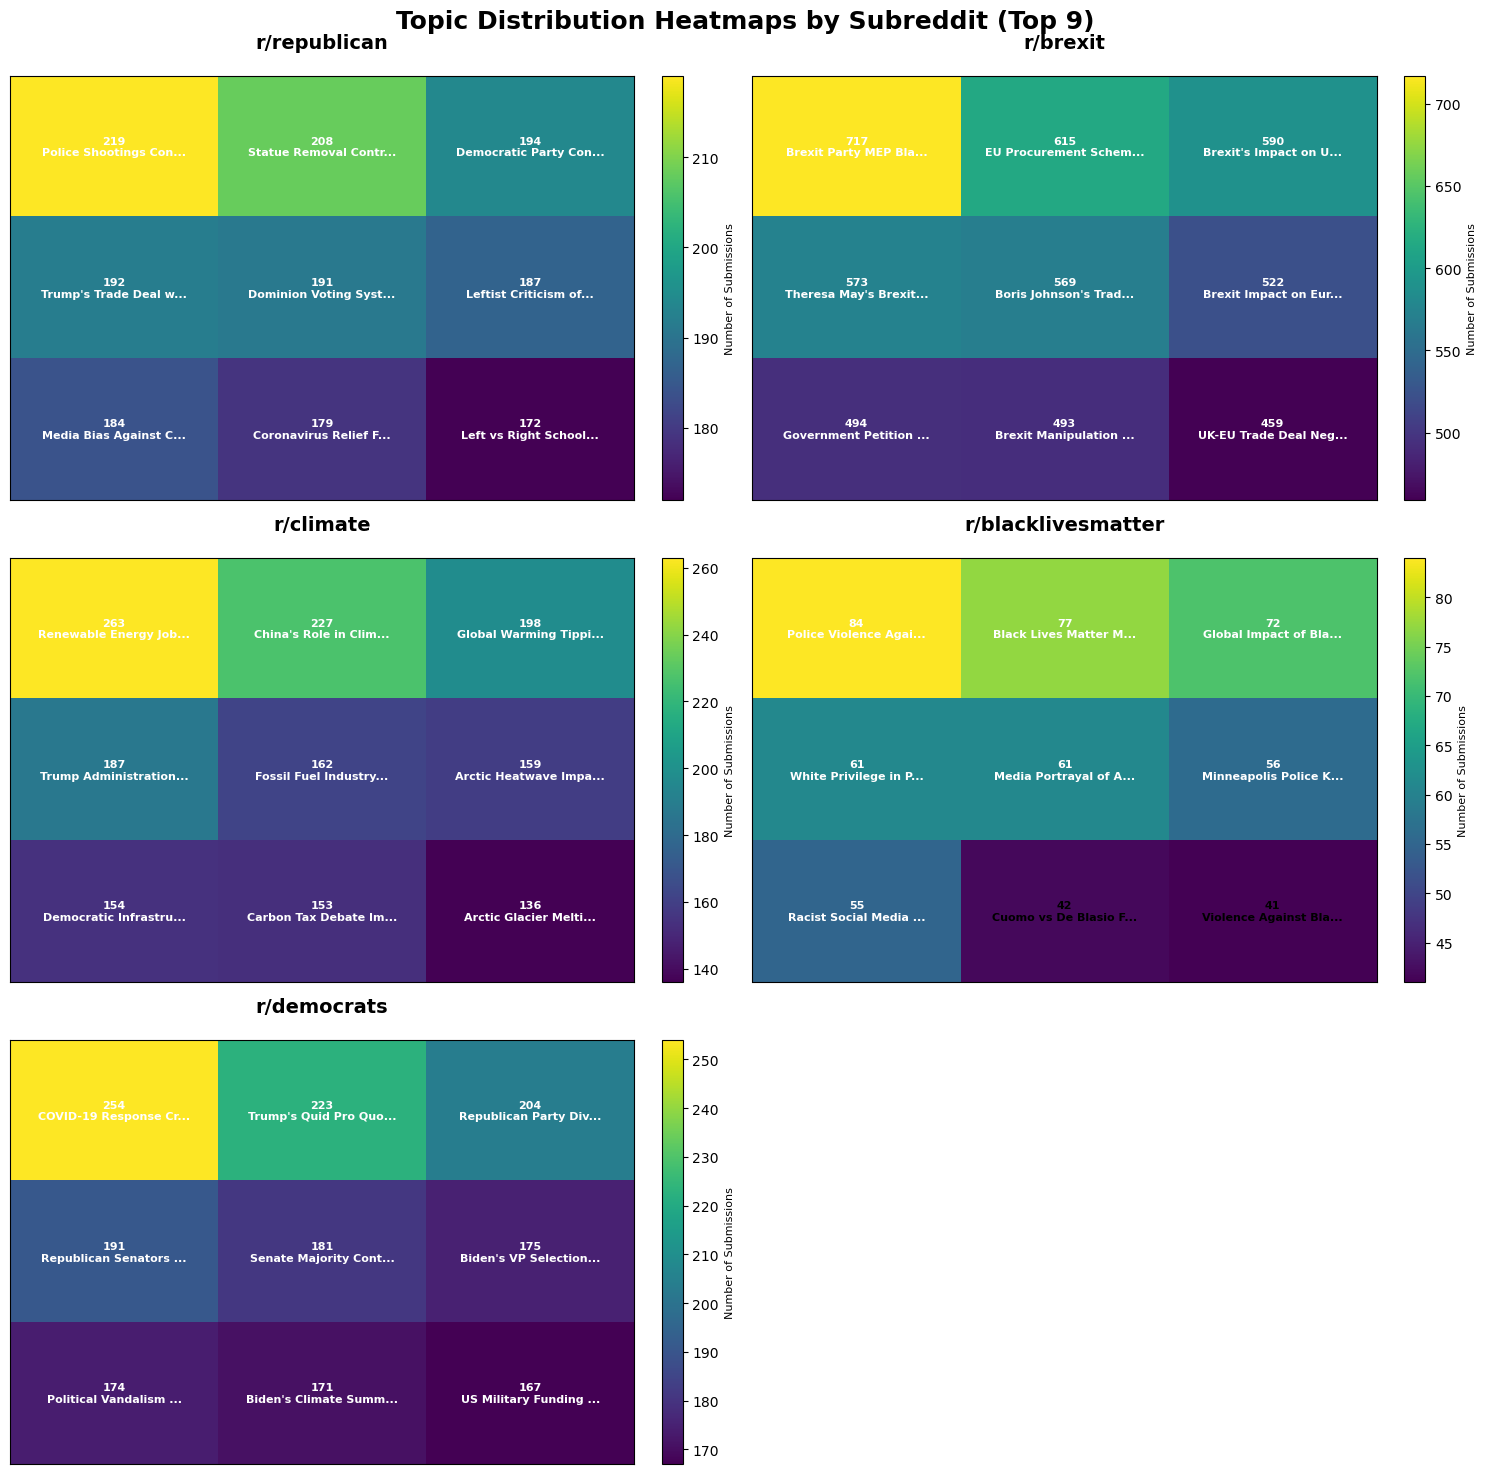

In [11]:
print("\nTopic Distribution Heatmap (Top 9):")
topics_heatmap = topic_viz.plot_topic_heatmaps_by_subreddit(
    submissions, raw, 
    top_topics_per_sub=9, 
    figsize=(15, 15)
)


Topic Agreement Patterns (Top 5):


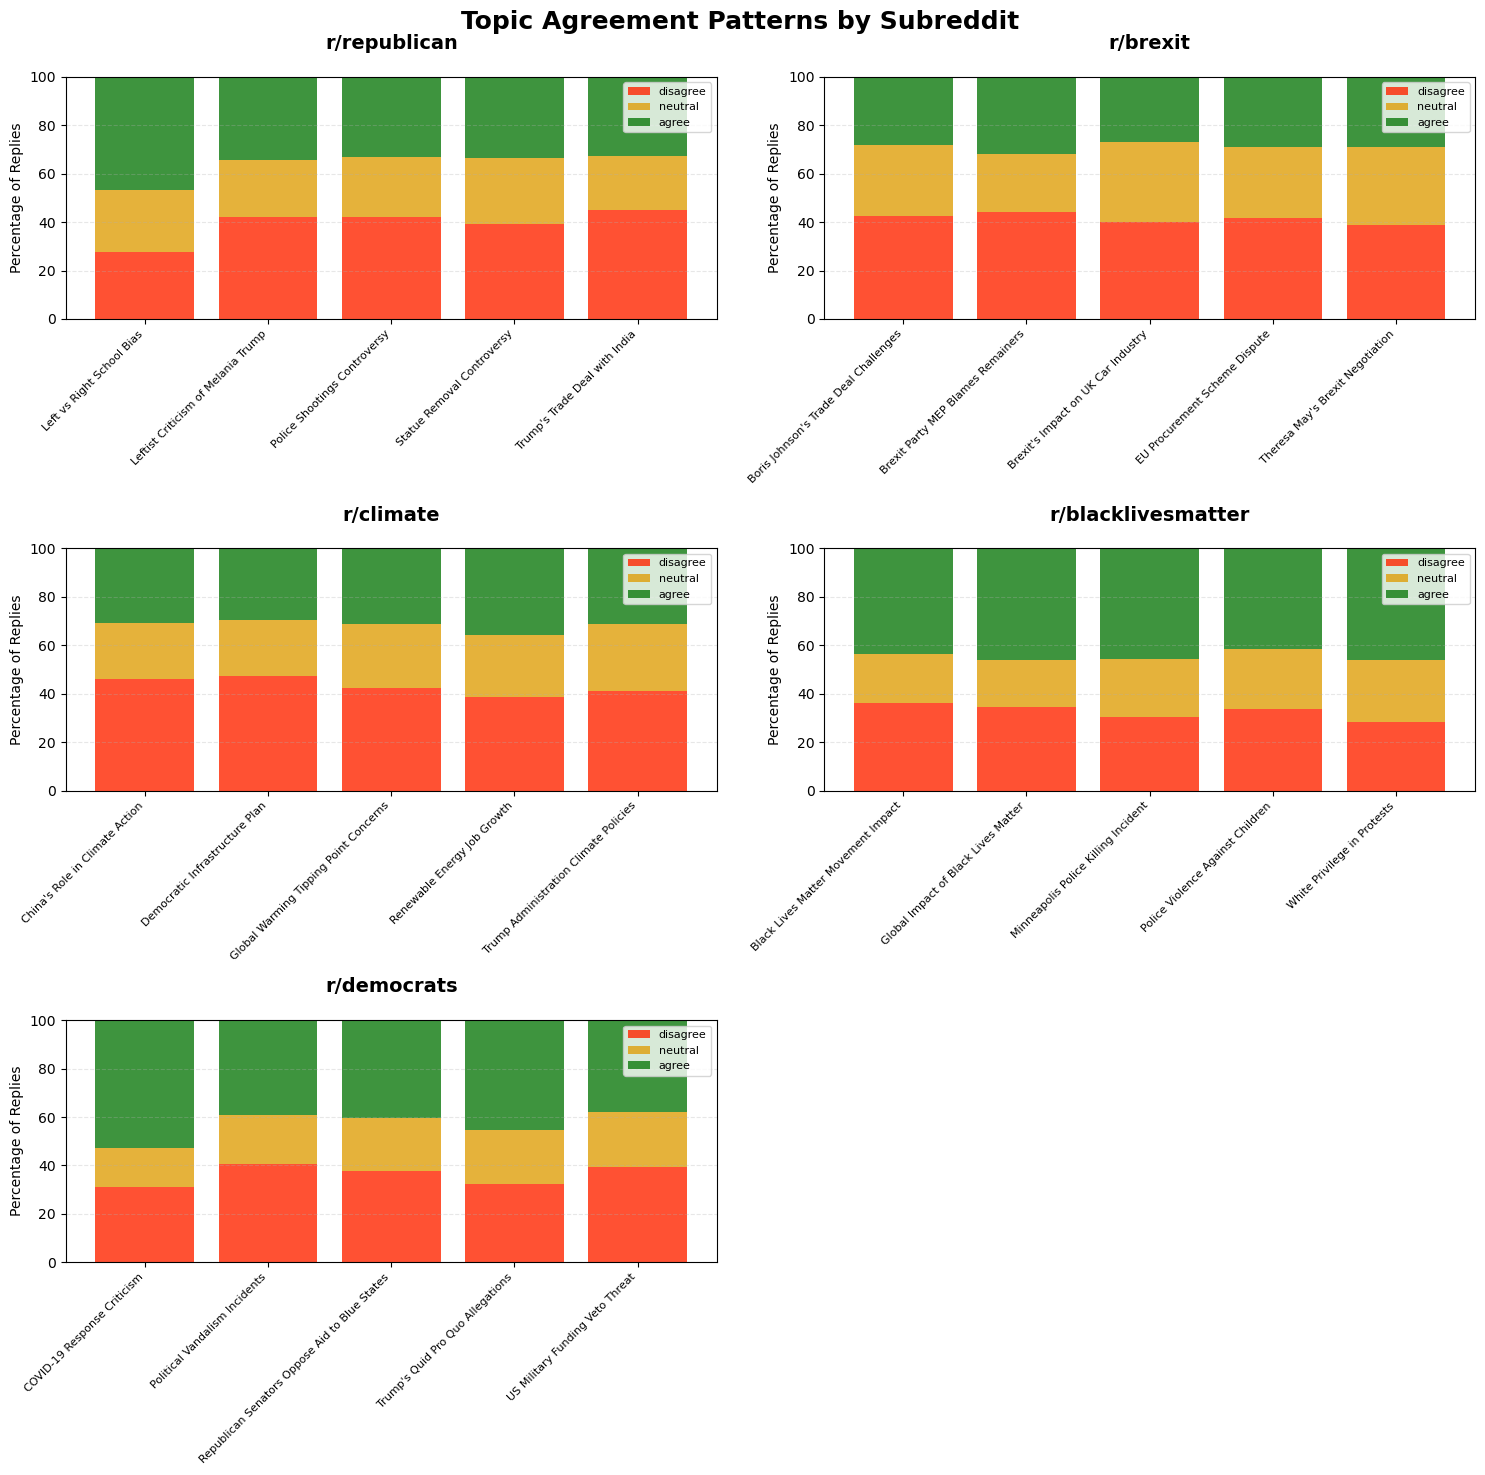

In [12]:
print("\nTopic Agreement Patterns (Top 5):")
topics_agreement = TopicVisualizer.plot_topic_agreement_by_subreddit(
    submissions, replies, 
    top_topics_per_sub=5, 
    figsize=(15, 15)
)


Subreddit Topics Bubble Plot:


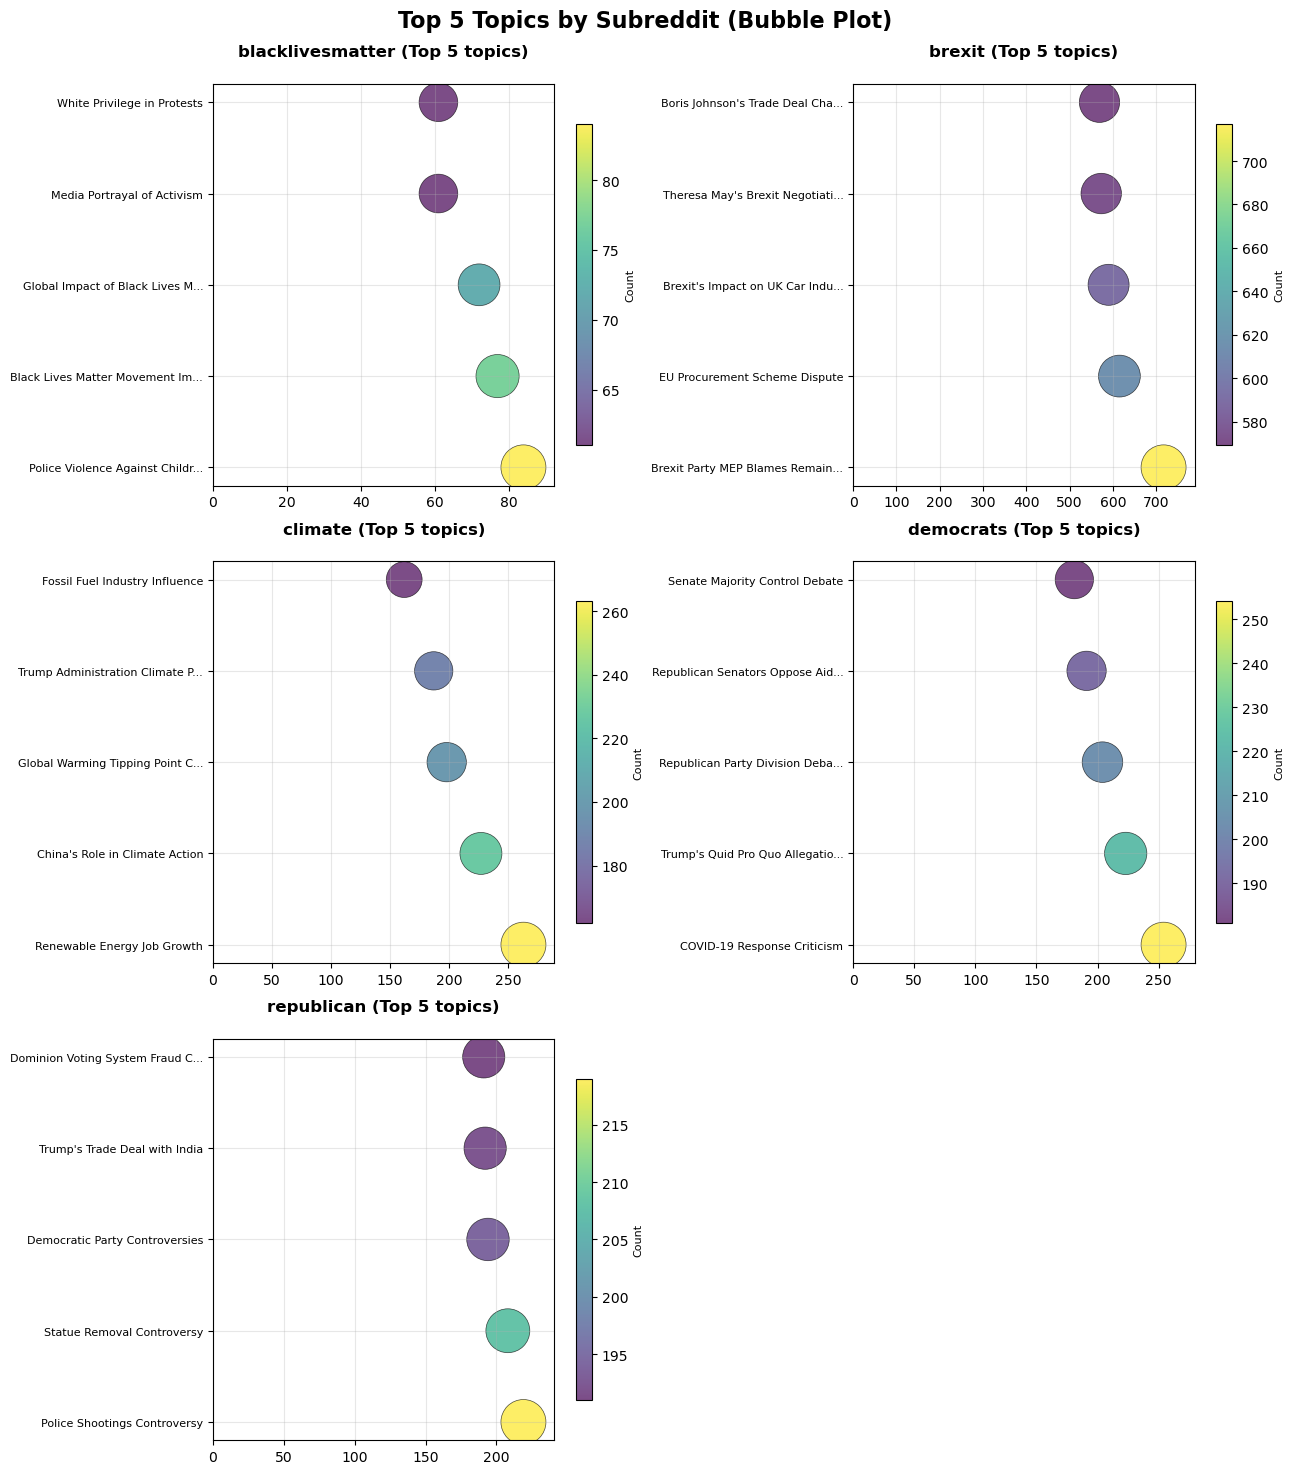

In [13]:
print("\nSubreddit Topics Bubble Plot:")
fig, axes = TopicVisualizer.plot_topic_bubble_subplots(
    topic_distribution=topic_distribution, 
    top_topics_per_sub=5, 
    figsize=(13, 15)
)

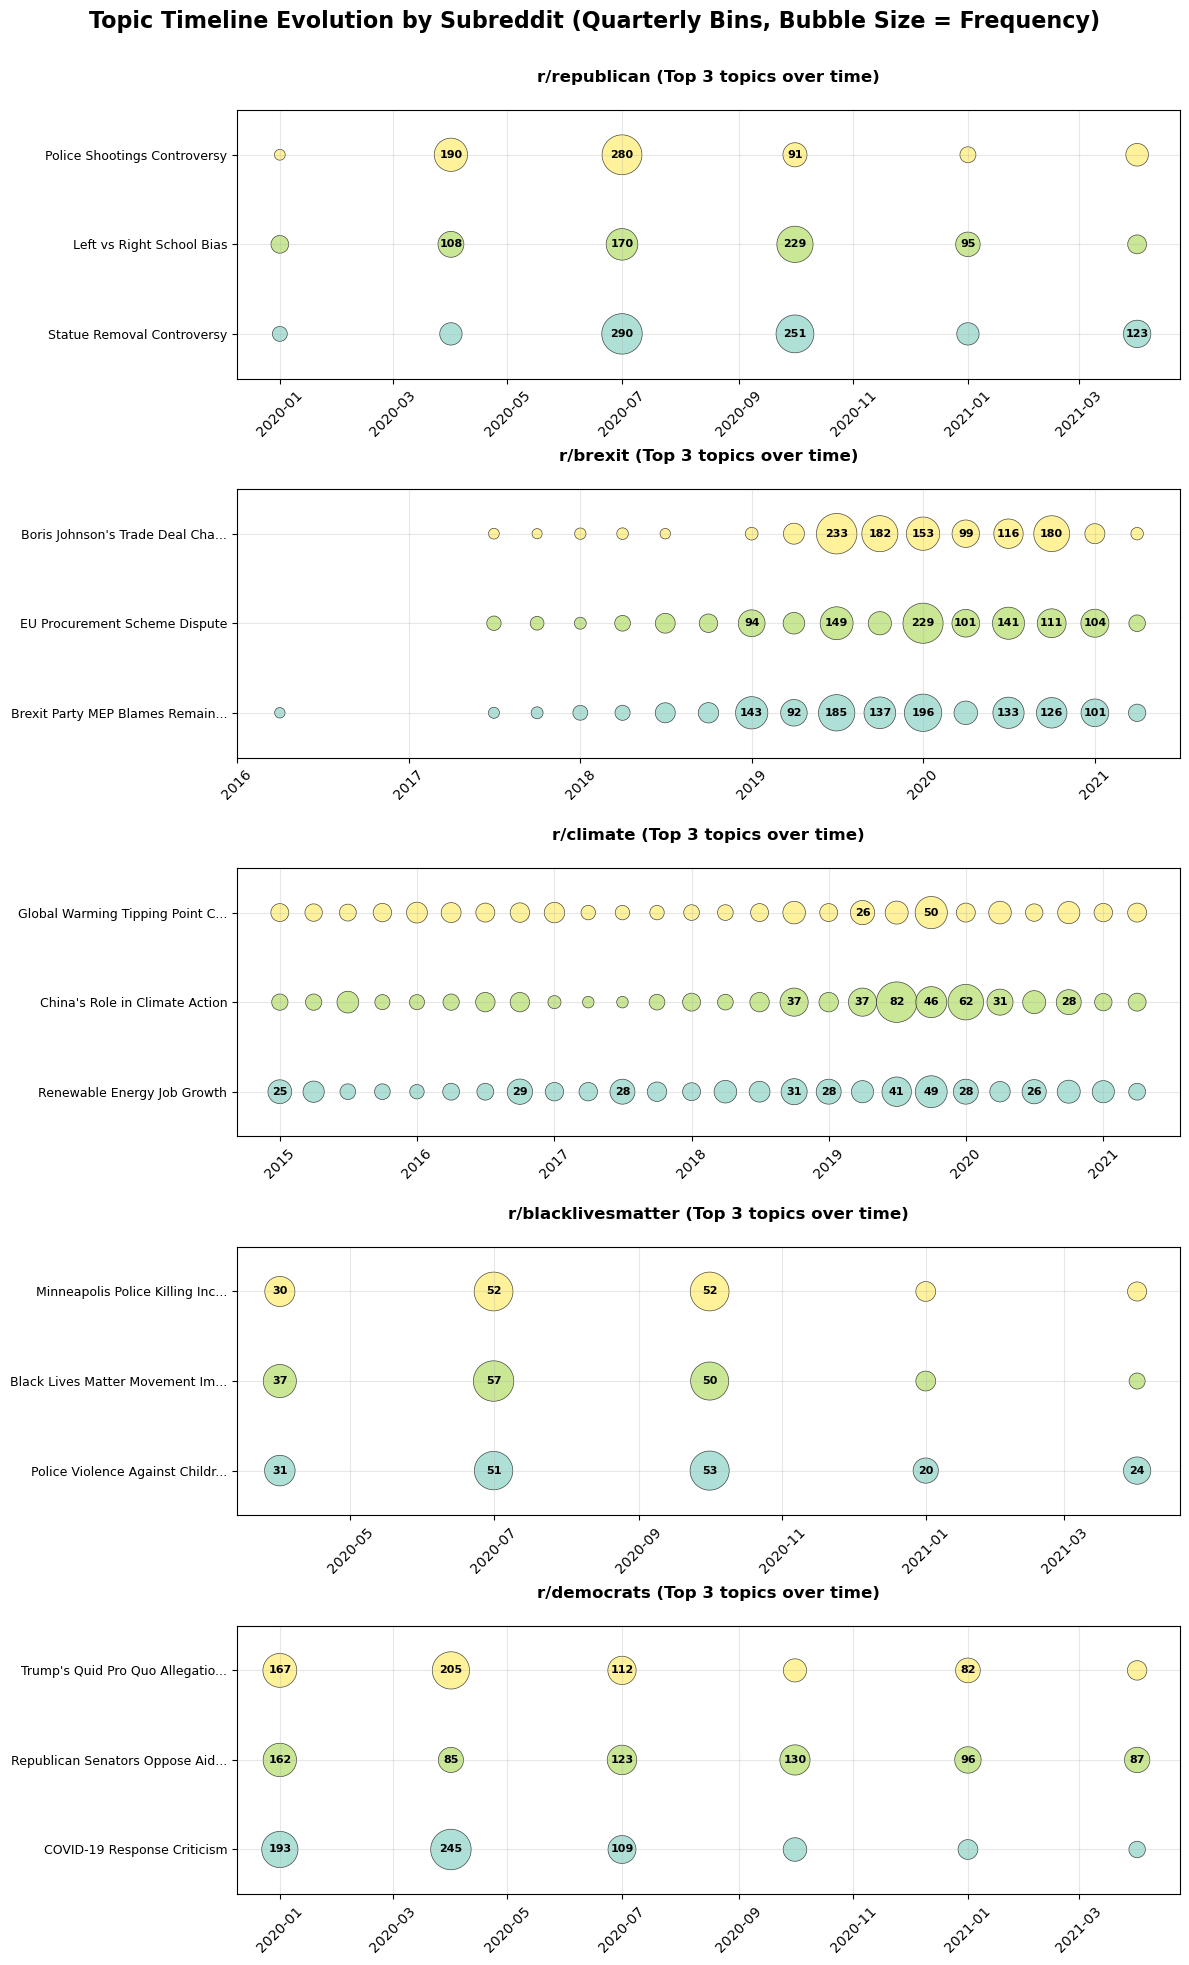

In [12]:
topics_timeline = TopicVisualizer.plot_topic_timeline_bubble_subplots(
    submissions_with_topics=submissions,
    raw=raw,
    top_topics_per_sub=3,  # Reduced for testing
    time_bins='Q',  # Quarterly bins
    figsize=(12, 20)
)
plt.show()